<a href="https://colab.research.google.com/github/alyaashrn/bikeshare/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Alya Sahrani]
- **Email:** [alyasahrani93@gmail.com]
- **ID Dicoding:** [alyaashrn]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa pendaftar selama beberapa bulan terakhir berdasarkan jumlah peminjaman sepeda?
- Bagaimana musim dapat mempengaruhi tingkat peminjaman sepeda?
Adakah musim tertentu yang menunjukkan peningkatan atau penurunan signifikan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/alyaashrn/bike_dataset/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Cleaning Data

In [ ]:
day_df = day_df.drop(columns=["instant", "dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [ ]:
category_columns = ['season', 'weathersit', 'holiday', 'mnth', 'workingday', 'weekday']

for column in category_columns:
  day_df[column] = day_df[column].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   yr          731 non-null    int64   
 2   mnth        731 non-null    category
 3   holiday     731 non-null    category
 4   weekday     731 non-null    category
 5   workingday  731 non-null    category
 6   weathersit  731 non-null    category
 7   temp        731 non-null    float64 
 8   atemp       731 non-null    float64 
 9   hum         731 non-null    float64 
 10  windspeed   731 non-null    float64 
 11  casual      731 non-null    int64   
 12  registered  731 non-null    int64   
 13  cnt         731 non-null    int64   
dtypes: category(6), float64(4), int64(4)
memory usage: 51.4 KB


In [ ]:
day_df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','september','Oktober','November','Desember'], inplace = True)
day_df['mnth'].value_counts()

Januari      62
Maret        62
Mei          62
Juli         62
Agustus      62
Oktober      62
Desember     62
April        60
Juni         60
september    60
November     60
Februari     57
Name: mnth, dtype: int64

In [ ]:
day_df['yr'].replace([0,1],['2011', '2012'], inplace = True)
day_df['yr'].value_counts()

2012    366
2011    365
Name: yr, dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Data

In [ ]:
day_df.groupby(['mnth', 'yr'])['cnt'].sum().unstack(fill_value=0)

yr,2011,2012
mnth,,
Januari,38189,96744
Februari,48215,103137
Maret,64045,164875
April,94870,174224
Mei,135821,195865
Juni,143512,202830
Juli,141341,203607
Agustus,136691,214503
september,127418,218573


In [ ]:
day_df.groupby('season')['cnt'].mean().reset_index()

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


## Visualization & Explanatory Analysis

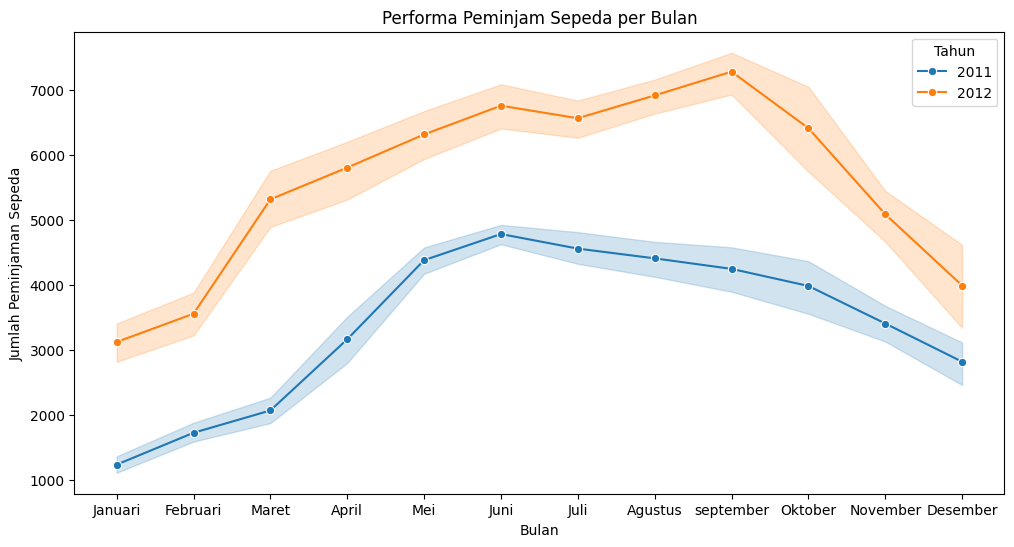

In [ ]:
plt.figure(figsize=(12, 6))
sn.lineplot(data=day_df, x='mnth', y='cnt', hue='yr', marker='o')
plt.title('Performa Peminjam Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Tahun')
plt.show()

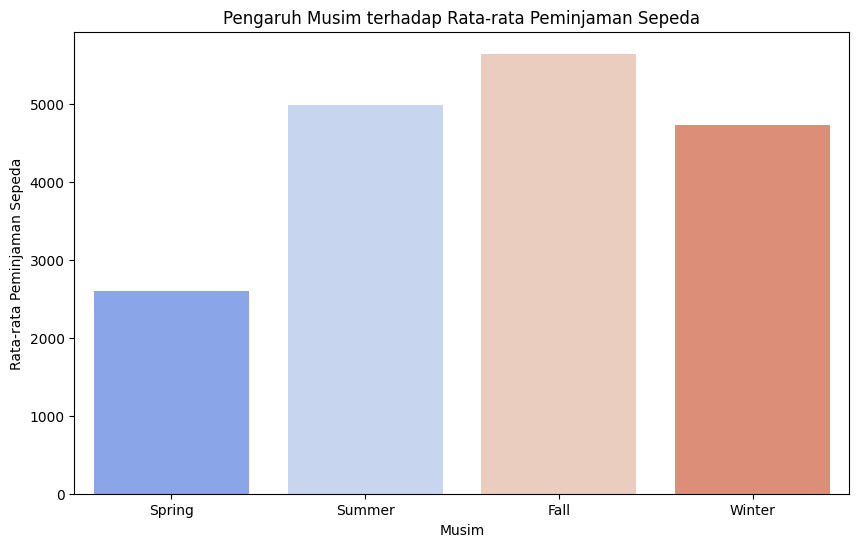

In [ ]:
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

grouped_by_season = day_df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))

sn.barplot(x='season', y='cnt', hue='season', data=grouped_by_season, palette='coolwarm')

plt.title('Pengaruh Musim terhadap Rata-rata Peminjaman Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.show()

### Pertanyaan 1:

Bagaimana performa Peminjam Sepeda selama beberapa bulan terakhir berdasarkan jumlah peminjaman sepeda?

### Pertanyaan 2:

Bagaimana musim dapat mempengaruhi tingkat peminjaman sepeda?
Adakah musim tertentu yang menunjukkan peningkatan atau penurunan signifikan?

## Conclusion

- Conclution pertanyaan 1

Performa peminjaman sepeda dalam beberapa bulan terakhur di tahun 2011 dan 2012 mengalami fluktuasi dengan periode kenaikan dan penurunan yang dapat diamati dari grafik yang disajikan.
Di tahun 2011, dari bulan Januari hingga Juni terlihat peningkatan performa yang signifikan karena mengalami kenaikan jumlah pendaftar dari 1000 hingga berkisar 4500 di bulan Juni yang mana menjadi puncak kenaikan di tahun 2011. Namun, setelah bulan Juni, pendaftar mulai berkurang dan terus mengalami penururnan jumlah hingga bulan Desember meskipun tidak mengalami penurunan yang sangat signifikan.
Di tahun 2012, jumlah peminjam meningkat dibandingkan tahun sebelumnya, terlihat di bulan Januari, jumlah pendaftar sebanyak 3000 dan terus mengalami peningkatan hingga bulan Juni tetapi mengalami sedikit penurunan di bulan Juli. Namun, setelahnya jumlah pendaftar meningkat kembali hingga berada pada puncak peningkatan jumlah di bulan September. Lalu setelahnya di bulan Oktober hingga Desember mengalami penurunan dengan jumlah yang signifikan
- Conclution pertanyaan 2

Musim dapat mempengaruhi tingkat peminjaman sepeda.
Terlihat dari diagram diatas, Spring (musim semi) memiliki jumlah peminjam berkisar di 2600. Kemudian pada Summer(musim panas) terdapat peningkatan dibandingkan musim semi dengan jumlah berkisar 4900, pada Fall (musim gugur) mengalami puncak peningkatan peminjam yaitu diatas 5000 yang mana melebihi peminjam di Summer, Sedangkan, pada Winter (musim dingin)jumlah peminjam mengalami penurunan jumlah yaitu menjadi 4728.
Oleh karena itu, musim yang memiliki jumlah peminjam paling banyak dan mengalami peningkatan secara signifikan adalah Fall (musim gugur) sementara musim yang memiliki jumlah peminjam paling sedikit yaitu Spring (musim semi)